In [3]:
import numpy as np
import cv2 as cv
from skimage import io
import matplotlib.pyplot as plt

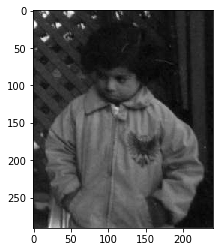

In [58]:
src = cv.imread('pout.jpg',0)
plt.imshow(src, cmap='gray')
height = np.size(src, 0)
width = np.size(src, 1)

In [59]:
f = np.fft.fft2(src) ## Fourier Transform
fshift = np.fft.fftshift(f) ## Shifting zero frequency to center
freq_spec = 20*np.log(np.abs(fshift))  ## Take absolute and log only for displaying purpo

In [204]:
gaussian_highpass_filter = np.zeros(src.size).reshape(src.shape)
gaussian_lowpass_filter = np.zeros(src.size).reshape(src.shape)
CUTOFF = 10
for i in range(0, height):
    for j in range(0, width):
        d_sqr = (i - height/2.0)**2 + (j - width/2.0)**2
        gaussian_coeff = np.exp(-d_sqr / (2.0 * CUTOFF * CUTOFF))
        gaussian_lowpass_filter[i][j] = gaussian_coeff
        gaussian_highpass_filter[i][j] = 1 - gaussian_lowpass_filter[i][j]
        

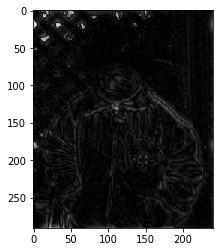

In [205]:
ghpf_filtered_f = fshift* gaussian_highpass_filter
ghpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(ghpf_filtered_f)))
plt.imshow(ghpf_image, cmap='gray')

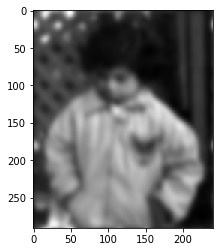

In [201]:
glpf_filtered_f = fshift*gaussian_lowpass_filter
glpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(glpf_filtered_f)))
plt.imshow(glpf_image, cmap='gray')

In [206]:
ideal_lowpass_filter = np.zeros(src.size, src.dtype).reshape(src.shape)
RADIUS = 10
for i in range(0, height):
    for j in range(0, width):
        if ((i - height/2)**2 + (j - width/2)**2) < RADIUS**2:    ## Circle filter
            ideal_lowpass_filter[i][j] = 1


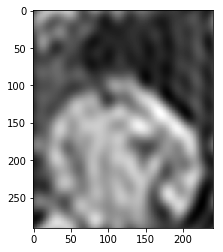

In [207]:
ilpf_filtered_f = fshift*ideal_lowpass_filter
ilpf_image = np.abs(np.fft.ifft2(np.fft.ifftshift(ilpf_filtered_f)))
plt.imshow(ilpf_image, cmap='gray')